# Predicting Potential Customers For an Insurance Policy - CoIL 2000 Challenge - Exploratory Data Analysis


## A.  Data Preparation
The provided data set has 5822 rows and 86 columns. The column names and their descriptions are given 
in a different file. So, first of all, I create a list of column names by reading through the 'TicDataDescr.txt' file
and then import the main data file 'ticdata2000.txt' as a DafaFrame with column names assigned by using the list created.

In [96]:
features_list = [] # read the feature description txt. file and make a list of feature names
fh = open('TicDataDescr.txt', 'r')
for i, line in enumerate(fh):
    if 32 < i < 51: # 204:
        features_list.append(line.rstrip('\n')[2:])
    elif 51 <= i< 204:
        features_list.append(line.rstrip('\n')[3:])
fh.close()

while '' in features_list:
    features_list.remove('')

print(features_list)
len(features_list)

['MOSTYPE Customer Subtype see L0', 'MAANTHUI Number of houses 1 – 10', 'MGEMOMV Avg size household 1 – 6', 'MGEMLEEF Avg age see L1', 'MOSHOOFD Customer main type see L2', 'MGODRK Roman catholic see L3', 'MGODPR Protestant ...', 'MGODOV Other religion', 'MGODGE No religion', 'MRELGE Married', 'MRELSA Living together', 'MRELOV Other relation', 'MFALLEEN Singles', 'MFGEKIND Household without children', 'MFWEKIND Household with children', 'MOPLHOOG High level education', 'MOPLMIDD Medium level education', 'MOPLLAAG Lower level education', 'MBERHOOG High status', 'MBERZELF Entrepreneur', 'MBERBOER Farmer', 'MBERMIDD Middle management', 'MBERARBG Skilled labourers', 'MBERARBO Unskilled labourers', 'MSKA Social class A', 'MSKB1 Social class B1', 'MSKB2 Social class B2', 'MSKC Social class C', 'MSKD Social class D', 'MHHUUR Rented house', 'MHKOOP Home owners', 'MAUT1 1 car', 'MAUT2 2 cars', 'MAUT0 No car', 'MZFONDS National Health Service', 'MZPART Private health insurance', 'MINKM30 Income 

86

Now import the data as a DataFrame and assign the feature names from the list prepared above

In [97]:
import pandas as pd
df = pd.read_table('ticdata2000.txt', names=features_list) # assign the feature names from the list prepared before

In [98]:

df.head()

,MOSTYPE Customer Subtype see L0,MAANTHUI Number of houses 1 – 10,MGEMOMV Avg size household 1 – 6,MGEMLEEF Avg age see L1,MOSHOOFD Customer main type see L2,MGODRK Roman catholic see L3,MGODPR Protestant ...,MGODOV Other religion,MGODGE No religion,MRELGE Married,...,APERSONG Number of private accident insurance policies,AGEZONG Number of family accidents insurance policies,AWAOREG Number of disability insurance policies,ABRAND Number of fire policies,AZEILPL Number of surfboard policies,APLEZIER Number of boat policies,AFIETS Number of bicycle policies,AINBOED Number of property insurance policies,ABYSTAND Number of social security insurance policies,CARAVAN Number of mobile home policies 0 - 1
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


Check missing values, constant columns and duplicate columns

In [99]:
# check for missing values
df.isnull().values.any() # gives 'False' - meaning there is no missing value
# find the constant columns
cols_to_remove = []
for col in df.columns:
    if df[col].std() == 0: 
        cols_to_remove.append(col)
print(cols_to_remove) # no column with constant elements was found

#remove duplicate columns
#print(df.shape)
df = df.T.drop_duplicates().T
print(df.shape) #- no duplicate columns found

[]
(5822, 86)


The data doesn't have any constant column, duplicate column or a column with any null element. 

## B.  Exploratory Analysis

 Start by exploring the target - see how many unique entries are their in the target column

In [100]:
ls = list(df['CARAVAN Number of mobile home policies 0 - 1'].values)
se = set(ls)
print(se, len(ls)) # there are 5822 entries in the target column and each entry is either 0 or 1

{0, 1} 5822


There are 5822 entries in the target column and each entry is either 1 (policy holder) or 0 (non-holder). Now we calculate
what percentage of the total customers are life insurence policy holders.

In [101]:
#print(ls.count(1), ls.count(0)) # no. of policy holders, non holders
num_policy_users = ls.count(1)
num_nonusers = ls.count(0)
users_perc = num_policy_users*100/(num_policy_users+num_nonusers)
print(num_policy_users, users_perc)

348 5.977327378907592


348 out of 5822 customers which is only about 6% of the total customers hold the insurence policy. I would like to answer the following questions-

 a) what are the most important features?
 
 b) How some important features are related to the target?


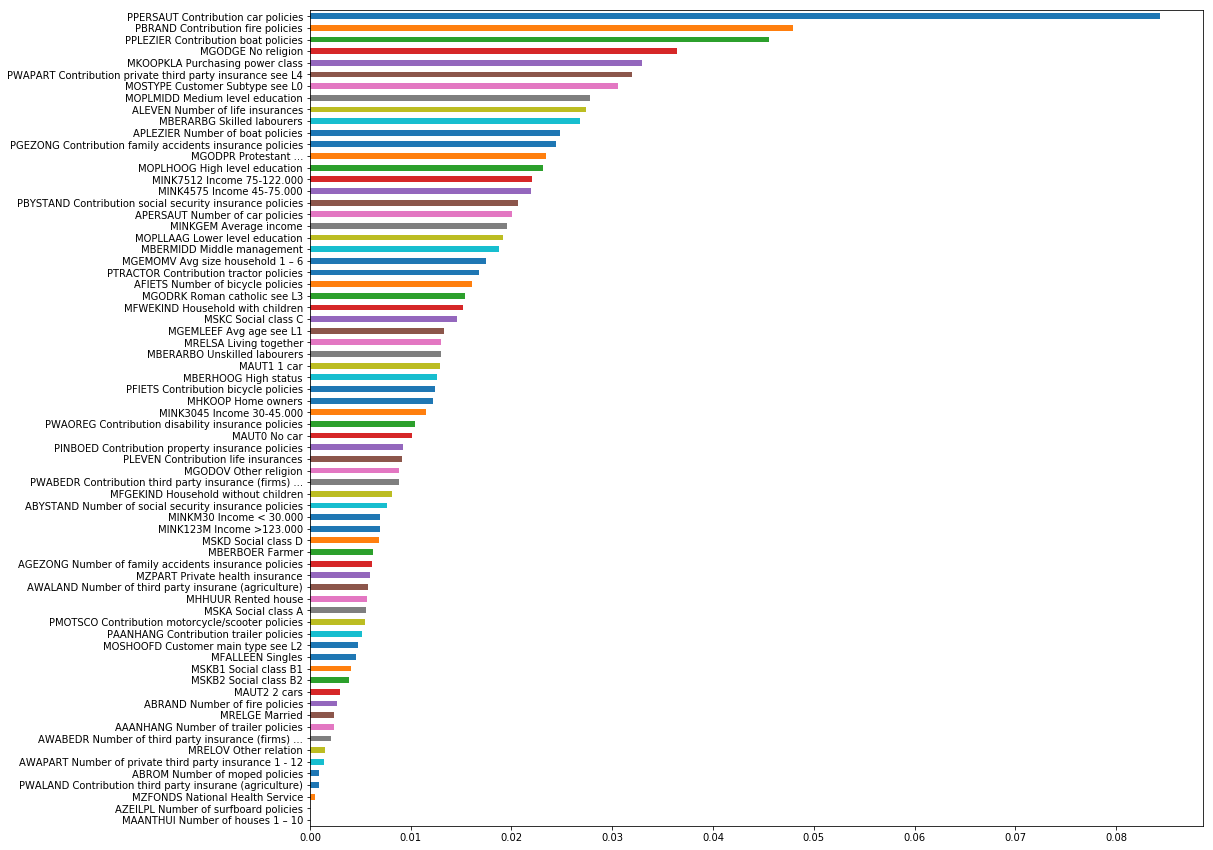

In [102]:
# a) feature selection by gradientboost - 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
X = df.drop('CARAVAN Number of mobile home policies 0 - 1',axis = 1)
y = df['CARAVAN Number of mobile home policies 0 - 1']
gb = GradientBoostingRegressor(random_state = 42) 
gb.fit(X, y)

feat_importances = pd.Series(gb.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(70)
imp_features = feat_importances.index.values
plt.figure(figsize=(16,15))
feat_importances.plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

Let's study in more datail about the target 'CARAVAN Number of mobile home policies 0 - 1' and the three most important features - 'PPERSAUT Contribution car policies',
'PBRAND Contribution fire policies' and 'PPLEZIER Contribution boat policies'.

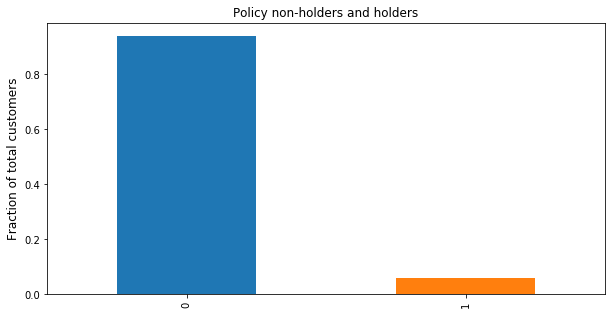

In [103]:
# target barplot
%matplotlib inline
df['CARAVAN Number of mobile home policies 0 - 1'].value_counts(normalize = True).plot.bar(figsize = (10,5), title =
                                                                           'Policy non-holders and holders')
plt.ylabel('Fraction of total customers', fontsize = 12)
plt.show()

The above barplot shows that, only a small fraction (348 out of 5822 as calculated before) of total customers (shown in yellow) own the insurence policy. Now we look for how the most important features are related to the target.

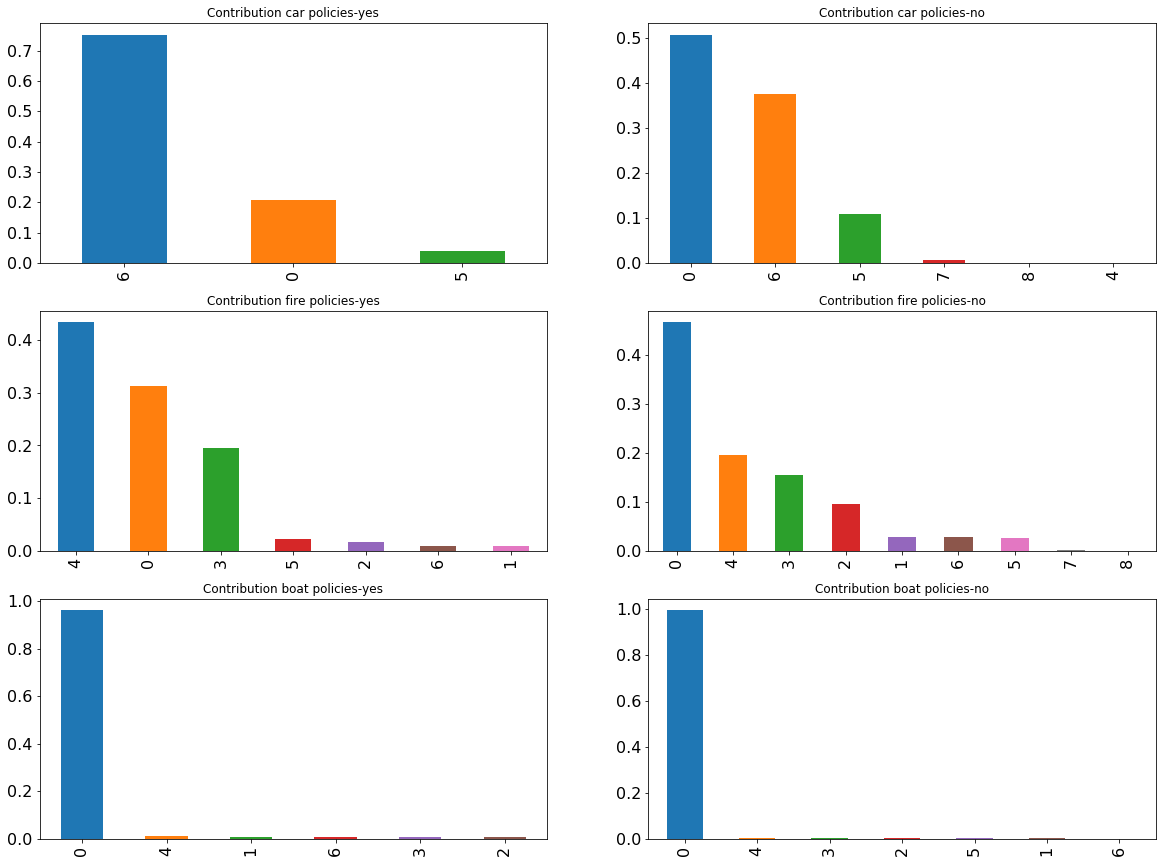

In [104]:
# feature-target relation
df_yes = df.loc[df['CARAVAN Number of mobile home policies 0 - 1']==1]
df_no = df.loc[df['CARAVAN Number of mobile home policies 0 - 1']==0]
plt.figure(figsize = (2,3))
plt.subplot(321)
df_yes['PPERSAUT Contribution car policies'].value_counts(normalize=True).plot.bar(figsize = (20,15), title =
                                                                                   'Contribution car policies-yes', fontsize = 16)
plt.subplot(322)
df_no['PPERSAUT Contribution car policies'].value_counts(normalize=True).plot.bar(figsize = (20,15), title =
                                                                            'Contribution car policies-no', fontsize = 16)

plt.subplot(323)
df_yes['PBRAND Contribution fire policies'].value_counts(normalize=True).plot.bar(figsize = (20,15), title =
                                                                                  'Contribution fire policies-yes', fontsize = 16)
plt.subplot(324)
df_no['PBRAND Contribution fire policies'].value_counts(normalize=True).plot.bar(figsize = (20,15), title =
                                                                                  'Contribution fire policies-no', fontsize = 16)

plt.subplot(325)
df_yes[ 'PPLEZIER Contribution boat policies'].value_counts(normalize=True).plot.bar(figsize = (20,15), title =
                                                                            'Contribution boat policies-yes', fontsize = 16)
plt.subplot(326)
df_no[ 'PPLEZIER Contribution boat policies'].value_counts(normalize=True).plot.bar(figsize = (20,15), title =
                                                                            'Contribution boat policies-no', fontsize = 16)


Compare each barplot on the left which is only for the customers who own the policy to the barplot on the right which is only for the customers who do not own the policy. Comparison of two barplots on the first row shows that customers having 6 for 'Contribution car policy' are more likely to buy the life insurence policy. Similar comparison of the barplots on the second row shows that customers having 4 for 'Contribution car policy' have more likely to buy the policy. The barplots on the last row are interesting. It is because  although 'Contribution boat policies' is the third most important feature the trend shown by the two barplots is very similar.

Next, we explore the feature 'MOSTYPE Customer Subtype see L0' because it is an interesting feature since it carries customer's
socioeconomic information like their education, income level, family size, age etc.

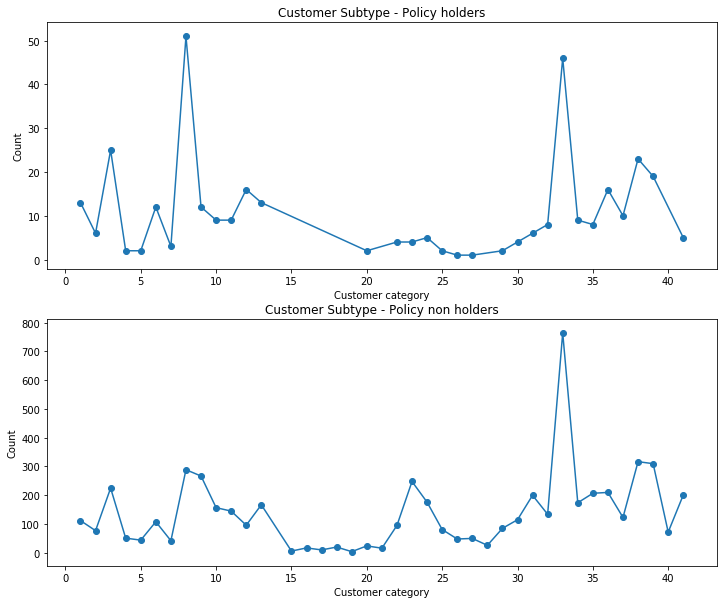

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
grouped_yes = df_yes.groupby('MOSTYPE Customer Subtype see L0', as_index = False)['CARAVAN Number of mobile home policies 0 - 1'].count()
grouped_no = df_no.groupby('MOSTYPE Customer Subtype see L0', as_index = False)['CARAVAN Number of mobile home policies 0 - 1'].count()
plt.figure(figsize = (12,10))
plt.subplot(2,1,1)
plt.plot(grouped_yes['MOSTYPE Customer Subtype see L0'].values, grouped_yes['CARAVAN Number of mobile home policies 0 - 1'].values)
plt.scatter(grouped_yes['MOSTYPE Customer Subtype see L0'].values, grouped_yes['CARAVAN Number of mobile home policies 0 - 1'].values)
plt.title('Customer Subtype - Policy holders')
plt.ylabel('Count')
plt.xlabel('Customer category')
plt.subplot(2,1,2)
plt.plot(grouped_no['MOSTYPE Customer Subtype see L0'].values, grouped_no['CARAVAN Number of mobile home policies 0 - 1'].values)
plt.scatter(grouped_no['MOSTYPE Customer Subtype see L0'].values, grouped_no['CARAVAN Number of mobile home policies 0 - 1'].values)
plt.title('Customer Subtype - Policy non holders')
plt.ylabel('Count')
plt.xlabel('Customer category')
plt.show()

Comparison of relative counts of customers in each category in the above two plots clearly tells what customer subtypes are more
likely to buy the policy. For example, customer category '8' (which corresponds to Middle class families) seems to be strongly 
correlated to customers having the insurence policy.

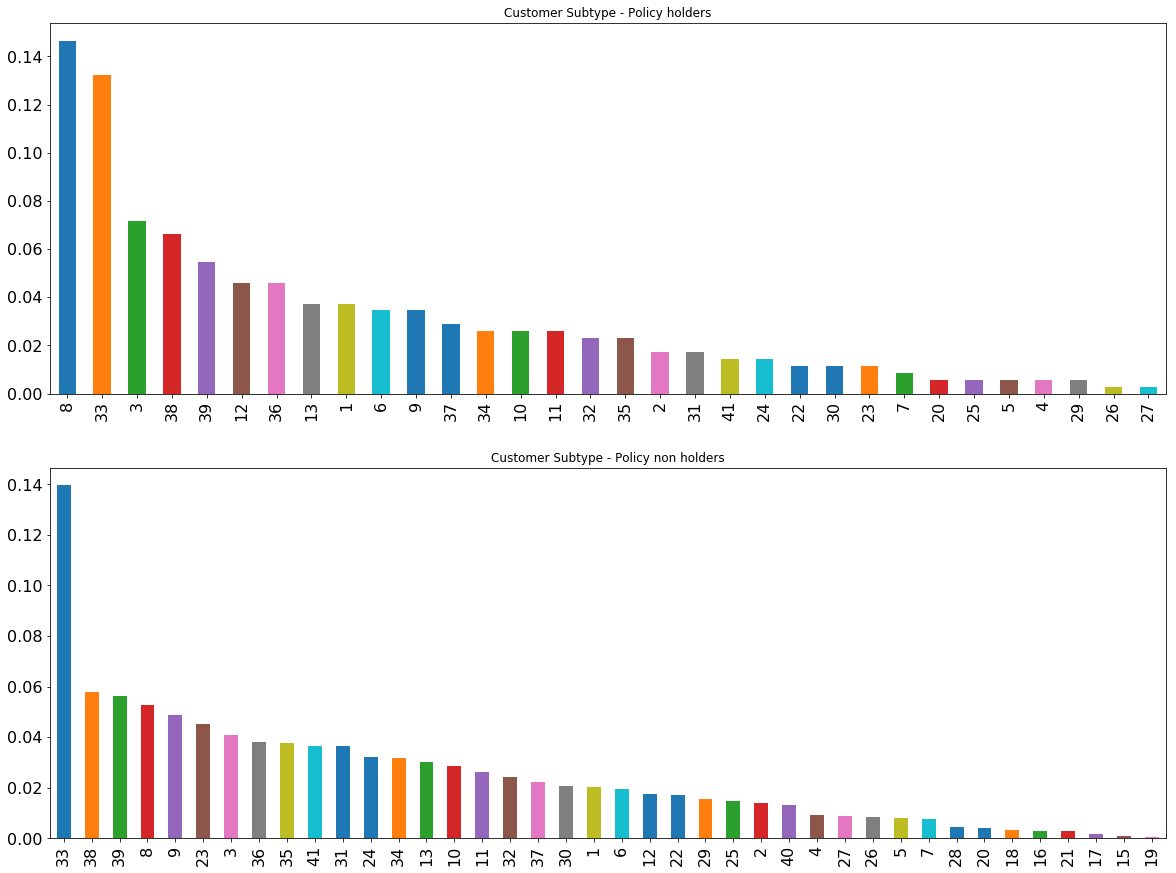

In [106]:
# Bar Plot might be more clear

plt.figure(figsize = (3,1))
plt.subplot(211)
df_yes['MOSTYPE Customer Subtype see L0'].value_counts(normalize=True).plot.bar(figsize = (20,15), title =
                                                                                   'Customer Subtype - Policy holders', fontsize = 16)
plt.subplot(212)
df_no['MOSTYPE Customer Subtype see L0'].value_counts(normalize=True).plot.bar(figsize = (20,15), title =
                                                                            'Customer Subtype - Policy non holders', fontsize = 16)


Comparing the heights of the bars in the above two barplots and also the relative magnitudes of counts for each category in the scatter plots, we find that people who are  
middle class families, high status seniors, and affluent young families are more likely to have the insurence compared to those with modern complete families, large family farms and who are young and under educated etc.

## C. Summary 
1. We imported the data as a DataFrame and assigned the column names by using a list of columns we prepared. We inspected the data and found that there is no missing, duplicate or constant column. The provided data set has 5822 rows and 85 features.
2. Among the 85 features we explored in detail about some important features and the target. This exploratory analysis suggests that the company should target to those people who have other insurence policies like car, boat and fire insurence policies, who are from a middle class family or an affluent young family, and/or are high status seniors. Also, people from modern complete families or large family, people with no other insurence policies,  farmers, young and undereducated are less likely to have the insurence policy.   